## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  The here goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
conv = df[df['converted'] == 1].shape[0]/df.shape[0]
conv

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df1 = df.query("group == 'control' and landing_page == 'new_page'") | df.query("group == 'treatment' and landing_page == 'old_page'")
df1.shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Tried to delete with above functions but all were not working but the last option which is effective but followed with an error
#df2 = df2[df1.index]
#df2[~np.in1d(np.arange(len(df2)), df1)]
#df2.iloc[np.setdiff1d(np.arange(len(df2)), df1)]
#df2[np.bincount(df1, minlength=len(df2)) == 0]
#df2 = df2[~df2.index.duplicated(keep='first')]

df2 = df [:]
df2.drop(df1.index , inplace = True )
df2.shape

C:\Users\eambriza\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(290585, 5)

In [9]:
df2.shape

(290585, 5)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'], keep=False)].user_id

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop(df2.index[2893], inplace = True )
df2.shape

C:\Users\eambriza\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2[df2['converted'] == 1].shape[0]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2['convert_bool'] = df2['converted'].astype('bool')

C:\Users\eambriza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df2.query('group == "control"')['convert_bool'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2.query('group == "treatment"')['convert_bool'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df2[df2['landing_page'] == 'new_page'].shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The probability of an individual to received new page is 50% that comfort more us to check directly the probability of an individual that was given in the treatment or control group, Which their probabilities is 11% and 12% respectivectly. The diference between them is too small making the this pre anaylysis insignificant to conclude if treatment/new_page page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: P_{new} - P_{old} <= 0$$


$$H_1: P_{new} - P_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [20]:
# Code changed - This code was in the first version 
"""# Perform the sampling distribution for the difference in converted
pages, c_pages = [],[]
for _ in range(1000):
    samp = df2.sample(100, replace = True) # unfortunatetly when i insert this df2.shape[0] my computer break in the middle with a memory error 
    c_page = samp.query('landing_page == "old_page" or landing_page == "new_page" ')['convert_bool'].mean()
    pages.append(samp)
    c_pages.append(c_page)"""

'# Perform the sampling distribution for the difference in converted\npages, c_pages = [],[]\nfor _ in range(1000):\n    samp = df2.sample(100, replace = True) # unfortunatetly when i insert this df2.shape[0] my computer break in the middle with a memory error \n    c_page = samp.query(\'landing_page == "old_page" or landing_page == "new_page" \')[\'convert_bool\'].mean()\n    pages.append(samp)\n    c_pages.append(c_page)'

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
# Code changed  
p_new = df2[df2['converted'] == 1].shape[0]/df2.shape[0]
#p_new = df2.query('landing_page == "new_page" ')['convert_bool'].mean()
#p_new= sum(c_pages)/len(pages)
round(p_new,4)

0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = p_new
round(p_old,4) 

0.1196

c. What is $n_{new}$?

In [23]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [24]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([0, 1], n_new , p=[p_new,1-p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([0, 1], n_old , p=[p_old,1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
p_new= sum(new_page_converted)/len(new_page_converted)
p_old= sum(old_page_converted)/len(old_page_converted)
p_new - p_old

0.001970599299340181

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
# Code changed - could do with binomial but unfortunatly wasnt confident to the application of this method to find pvalue since
# the result wasnt acurrate for what we expect (0.9)

#p_diffs, new_pages, old_pages = [],[],[]
p_diffs = []
for _ in range(10000):
    samp = df2.sample(df2.shape[0], replace = True) # unfortunatetly when i insert this df2.shape[0] my computer break in the middle with a memory error 
    p_new = samp.query('landing_page == "new_page"')['convert_bool'].mean()
    p_old = samp.query('landing_page == "old_page"')['convert_bool'].mean()
    
#p_new = np.random.binomial(n_new, p_new,  10000)/n_new
#p_old = np.random.binomial(n_old, p_old,  10000)/n_old
    #p_diffs = new_converted_simulation - old_converted_simulation
 
    p_diffs.append(p_new - p_old)
p_diffs

[-0.0017681063763606841,
 -0.0006127310913686262,
 -0.002893929206698967,
 -0.0026207380886322656,
 -0.001507550634795199,
 -0.0010920065662645279,
 -0.0017129581340821626,
 -0.001198282985514748,
 -0.0012467923735820646,
 -0.0023893631500413043,
 -0.00099275351892196,
 -0.0020056988171593265,
 -0.0007877380359917197,
 -0.002843909119043378,
 -0.00226225479950988,
 -0.001762281202280419,
 -0.0035751040506199205,
 -0.0003341347449705989,
 -0.0014139122257451758,
 -0.0038661546263400876,
 -0.0011152464377763294,
 -0.0017066415028555576,
 -0.0025013259422225903,
 -0.000596011634304755,
 -0.0017880646191591881,
 -0.0006987121442728894,
 -0.0020065324474459606,
 0.0003258984493661049,
 -0.0022318314390620264,
 -0.0013515076815850263,
 -0.0021942557344448582,
 -0.004184977641890603,
 -0.0013530433930335484,
 -0.001289124286325244,
 -0.0018137162558241743,
 -0.0024442045122790856,
 -0.0030503769567382794,
 -0.0015033683122665786,
 -0.002417661506850896,
 -0.0010246814272287658,
 -0.0027122314

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

The plot look like what i expected, that was due to the fact that p_new - p_old under the null is 0. Therefore, i was expexting to see a plot where 0 is centred and the other valeus would be around the 0 as well.  

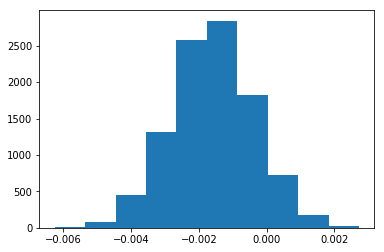

In [29]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0,np.std(p_diffs), len(p_diffs))
null_vals

array([ 8.85329271e-04,  9.97048530e-04,  1.04112245e-03, ...,
       -7.69746366e-04, -4.87365356e-04,  2.00106250e-05])

In [31]:
ab_new = df2.query('landing_page == "new_page"')['convert_bool'].mean()
ab_old = df2.query('landing_page == "old_page"')['convert_bool'].mean()
ab_obs_diff = ab_new - ab_old 
# on average the old page converts at least ab_obs_diff ?paginas? more than the new page 

(null_vals > ab_obs_diff ).mean()

0.8986

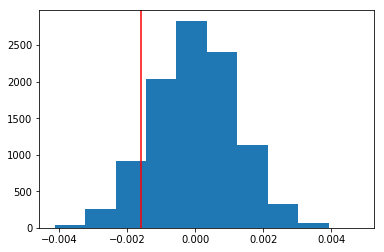

In [32]:
# Bonus
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(ab_obs_diff, c='red');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We used this sampling distribution to simulate the distribution under the null hypothesis, by creating a random normal distribution centered at 0 with the same spread and size.
We computed the observed difference between the metric, average in converted pages, for the new_page and old_page group.
We computed the p-value by finding the proportion of values in the null distribution that were greater than our observed difference.
in scientific studies this value called is called p-value, which is used here to determine the tatistical significance of our observed difference.
Since the alpha is 5% we reject the null hypotesis because the p-value (90%) is more than alpha.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and convert_bool == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and convert_bool == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

convert_old , convert_new , n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')
z_score, p_value 

(-1.3109241984234394, 0.9050583127590245)

In [35]:
from scipy.stats import norm
norm.cdf(z_score)
# 0.9999999383005862 # Tells us how significant our z-score is

0.09494168724097551

In [36]:
norm.ppf(1-(0.05/2))
# 1.959963984540054 # Tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Picked a significance level of 95%. 
Since this is a test for the difference, it's a two-tail test so if a z-score past -1.96 or 1.96 will be significant. 
Which was not the case since the z_score is 1.31.
Which means that both pages are statistically equal from each other and we would expect their long-term performance to be equal from one another.
Diferent from the parts j. and k. were we reject the null hypotesis because the p-value (0.90) is more than alpha.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression - because besides the fact that can work with categorical variables is also a regression approach used to predict only two possible outmcomes.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# Creating dummy variable column for which page each user received
# For this point i understood that we shoudld create dummy variable column for landing_page. However does not seem to be relevant
# Since the dummy group column has the same values  
# df2['landing'] = pd.get_dummies(df2['landing_page'])['new_page']

# Creating intercept 
df2['intercept'] = 1

# Creating ab_page column 
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

C:\Users\eambriza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\eambriza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
converts = sm.OLS(df2['converted'], df2[['intercept', 'ab_page']])
converts_p = converts.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
converts_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Tue, 19 Jun 2018   Prob (F-statistic):              0.190
Time:                        01:14:44   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.190
Because in regression the hypothesis test for each x-variable is a test of if that population slope is equal to zero vs. an alternative where the parameter differs from zero
It differs from part II because the hypotheses in part II says that the control group is equal or better than the treatment group until we prove the other way arround with the alternative and in the null in part III says that theres no diferrence between the treatment and control group until we prove the other way arround with the alternative.**
 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Timestamp can be a great influencer since we can find the "peak-time" during a day, week or month and from there find how much can change an individual to convert. 
Significant bivariate relationships are not always significant in multiple liner regression that means that a variable can be significant in a simple regression model and not when we add into a multiple linear regression model.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [41]:
# Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('US', axis=1)

In [42]:
country_page = sm.OLS(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']])

In [43]:
results_country_page = country_page.fit()
results_country_page.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Tue, 19 Jun 2018   Prob (F-statistic):              0.178
Time:                        01:14:45   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1203      0.001    128.267      0.000       0.118       0.122
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
CA            -0.0042      0.003     -1.514      0.130      -0.010       0.001
UK             0.0010      0.001      0.744      0.457      -0.002       0.004
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The coefficients  CA, UK AB_page were -0.0042, 0.0010 and 0.1203 respectively, represent the expected change in response for each 1 unit increase on the other variable.
Rsquared variable - from this whe can conclude that the model doesnt fit, were we have 0% of the convertion variaty.
The Pvalues suggests that CA, UK and AB_page are statistically insignificant to an individual convert a page/. Due to the fact that this results were diferent than zero.** 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
# Function created for iterration between the page column and countries 
def calculate(x,y):
    return x*y

In [45]:
# Create 2 columns to add the new iterration columns  
df_new['page_ca'] = np.multiply(df_new['ab_page'],df_new['CA'])
df_new['page_uk'] = np.multiply(df_new['ab_page'],df_new['UK'])

In [46]:
country_new_p = sm.OLS(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK','page_ca','page_uk']])

In [47]:
country_new_page = country_new_p.fit()
country_new_page.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Tue, 19 Jun 2018   Prob (F-statistic):              0.197
Time:                        01:14:47   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1206      0.001    118.563      0.000       0.119       0.123
ab_page       -0.0022      0.001     -1.505      0.132      -0.005       0.001
CA            -0.0018      0.004     -0.467      0.641      -0.010       0.006
UK            -0.0006      0.002     -0.307      0.759      -0.004       0.003
page_ca       -0.0047      0.006     -0.845      0.398      -0.016       0.006
page_uk        0.0033      0.003      1.180      0.238      -0.002       0.009
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The coefficients  CA, UK, AB_page, page_ca and page_uk were -0.0018, -0.0006, -0.0022, -0.0047 and 0.0033 respectively, were page_uk was the only one with a positive coeficient
These coefficients represent the expected change in response for each 1 unit increase on the other variable.
Rsquared variable - from this whe can conclude that the model doesnt fit, were we have 0% of the convertion variaty.
The Pvalues suggests that CA, UK, AB_page, page_ca and page_uk are statistically insignificant to an individual convert a page/. Due to the fact that this results were diferent than zero.** 
